In [1]:
%matplotlib inline 
import os 
import numpy as np
import nibabel as nb 
import matplotlib.pyplot as plt 
import itertools
import matplotlib
import itertools
import seaborn as sns 
sns.set_style('white')
#plt.rcParams['font.family'] = 'Myriad Pro'

datadir_qsm = '/Users/kanaan/Google Drive/TS-EUROTRAIN/RESULTS_QSMv3/DATA_QSM'
datadir_mrs = '/Users/kanaan/Google Drive/TS-EUROTRAIN/RESULTS_QSMv3/DATA_MRS'
save_fig_dir = '/Users/kanaan/Google Drive/TS-EUROTRAIN/Papers/2016_QSM_paper/Figures_python_v3'




In [2]:
# plot QSM GM example subject 

mask = nb.load(os.path.join(datadir_qsm, 'mask.nii.gz')).get_data()
#qsm = nb.load(os.path.join(datadir_qsm, 'QSMnorm.nii.gz')).get_data() * mask
qsm = nb.load(os.path.join(datadir_qsm, 'QSM_native_GM.nii.gz')).get_data() * mask
mrs = nb.load(os.path.join(datadir_qsm, 'STR.nii.gz')).get_data() 

qsm[qsm==0] = np.nan
mrs[mrs==0] = np.nan

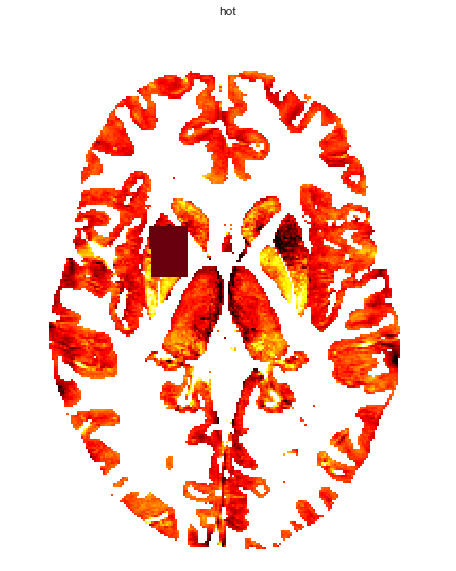

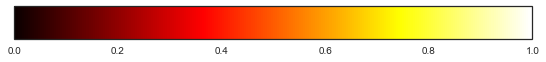

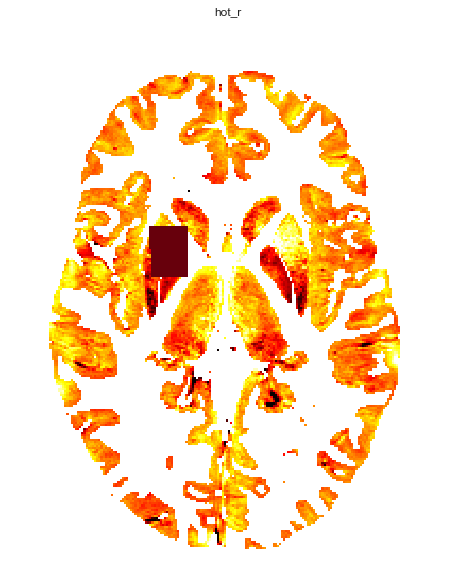

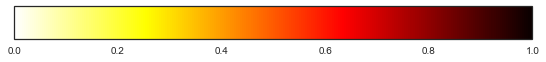

In [5]:
cmaps = [
        'viridis', 'plasma', 'inferno', 'magma',
        'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
        'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
        'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn',
        #'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
        'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
        'hot', 'afmhot', 'gist_heat', 'copper',
        'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
        'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic',
        #'Pastel1', 'Pastel2', 'Paired', 'Accent',
        #'Dark2', 'Set1', 'Set2', 'Set3',
        #'tab10', 'tab20', 'tab20b', 'tab20c',
        #'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
        'gnuplot', 'gnuplot2', 'CMRmap', 
        #'cubehelix', 'brg', 'hsv',
        #'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar'
        ]

cmaps = ['hot', 'hot_r']

def plot_cmap(cmap, fname=None):
    import matplotlib.pyplot as plt
    import matplotlib as mpl

    fig = plt.figure(figsize=(8, 3))
    ax1 = fig.add_axes([0.05, 0.80, 0.9, 0.15])

    cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap, orientation='horizontal')
    plt.tick_params(None)
    
for cmap in cmaps:
    fig = plt.figure()
    fig.set_size_inches(10,10)
    ax = plt.axes(frameon=False)
    plt.imshow(np.rot90(qsm[:,:,65]), interpolation='none', cmap =cmap, vmin = -.2 , vmax = .2)
    plt.imshow(np.rot90(mrs[:,:,65]), interpolation='none', cmap ='Reds', vmin = -.1 , vmax = .1)
    plt.title(cmap)
    #ax.set_xlim(35, 170)
    #ax.set_ylim(200,50)
    ax.set_xticklabels = []
    ax.set_yticklabels = []
    ax.axes.get_yaxis().set_visible(False)
    ax.axes.get_xaxis().set_visible(False)
    
    plot_cmap(cmap)
    #plt.imshow(np.rot90(mrs[:,:,65]), interpolation='none', cmap ='Oranges', vmin = -.2 , vmax = .2)

# plot spectra 


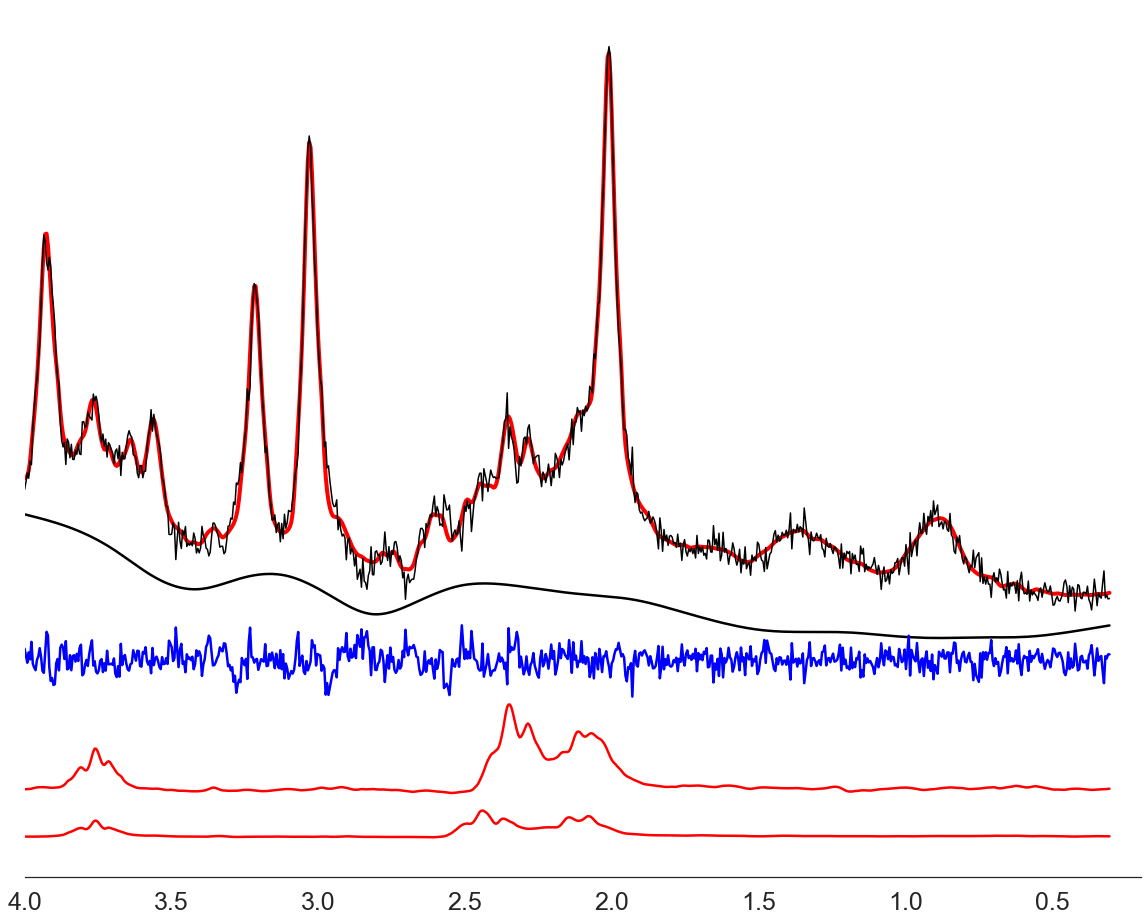

In [7]:

def map_metabolite_fits(subject, voxel_name, ppmst):
    datadir_mrs = '/Users/kanaan/Google Drive/TS-EUROTRAIN/RESULTS_QSMv3/DATA_MRS'

    #coord = os.path.join(datadir, subject, 'lcmodel_twix_NMEACH', voxel_name, 'ppm_%s'%ppmst, 'coord')    
    coord = os.path.join(datadir_mrs, 'coord')    
    n_points  = [int(line[2:5]) for i,line in enumerate(open(coord)) if 'points on ppm-axis' in line][0]
    
    def map_coords(xlist):
        index  = [i for i,line in enumerate(open(coord)) if all(x in line for x in xlist)][0] +1
        listed = [np.array(line.split()) for i, line in enumerate(open(coord)) if i in xrange(index, index+n_points/10)]
        mapped =  np.array(map( float, np.asarray(list(itertools.chain.from_iterable(listed)))))
        return mapped
    fit  = map_coords(['fit to the data'])
    phs  = map_coords(['phased data points'])
    ppm  = map_coords(['points on ppm-axis'])
    bsl  = map_coords(['background values'])
    
    #ACC_detactable_metsbolites = ['Asp', 'Cre', 'tCho', 'mIno', 'NAA', 'NAAG', 'tNAA', 'Glu', 'Gln', 'Glx', 'GABA', 'Tau', 'Lac']¶
    
    glu  = map_coords(['Glu','Conc'])
    gln  = map_coords(['Gln','Conc'])
    gaba = map_coords(['GABA','Conc'])
    fig = plt.figure(figsize=(20,16))
    ax = plt.subplot(111)
    
    linewidth = 2.5
    
    ax.plot(ppm, 3.3e6 + fit, 'r', linewidth = 4)
    ax.plot(ppm, 3.3e6 + phs, 'k', linewidth = 1.5)
    ax.plot(ppm, 3.3e6 + bsl, 'k', linewidth = linewidth)
    ax.plot(ppm, 3.35e6 + (fit- phs), 'b', linewidth = linewidth)
    ax.plot(ppm, 2.7e6 + glu - bsl, 'r', linewidth = linewidth)
    ax.plot(ppm, 2.5e6 + gln - bsl, 'r', linewidth = linewidth)
     
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_yticks([]) 
    ax.set_yticklabels([])
    ax.get_xaxis().tick_bottom()
    
    plt.xlim(0.2,4)
    plt.xticks(fontsize=25, weight='bold')

    for tick in ax.get_xaxis().get_major_ticks():
        tick.set_pad(15)
        tick.label1 = tick._get_text1()
    
    ax.tick_params(axis='x', direction='in', labelsize=25)
    
        #plt.ylim(-2e5, 10e6)    
    plt.gca().invert_xaxis()
    
    plt.savefig(os.path.join(save_fig_dir, 'plot_mrs.png'), dpi = 300, transparent= True, bbox_inches = 'tight')
    
map_metabolite_fits('TSEP', 'STR', '4.0')